In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [2]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx=speed*cos(pi*theta/180)
    vz=speed*sin(pi*theta/180)    
    t,x,z=0,0,height
    ts,xs,zs=[t],[x],[z]
    while z>=0:
        t+=dt
        vz+=g*dt
        x+=vx*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts,xs,zs

In [3]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs=traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices=[]
            second=0
            for i,t in enumerate(traj[0]):
                if t>=second:
                    second_indices.append(i)
                    second+=1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl=plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width=7
    coords_height=(plt.ylim()[1] - plt.ylim()[0])
    coords_width=(plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width, width*coords_height/coords_width)

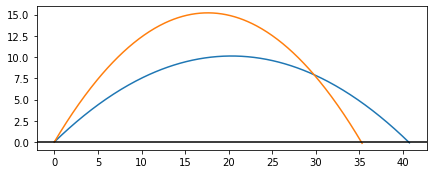

In [4]:
plot_trajectories(
    trajectory(45),
    trajectory(60)
)

In [5]:
def landing_position(traj):
    return traj[1][-1]

In [6]:
def hang_time(traj):
    return traj[0][-1]

In [7]:
def max_height(traj):
    return max(traj[2])

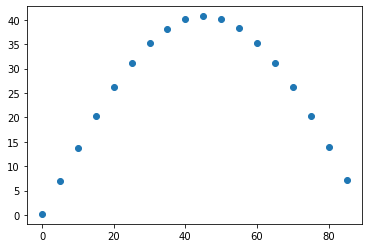

In [8]:
import matplotlib.pyplot as plt
angles=range(0,90,5)
landing_positions=[landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)

In [9]:
landing_position(trajectory(50))

40.10994684444007

In [10]:
landing_position(trajectory(130))

-40.10994684444007

In [11]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs=traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices=[]
            second=0
            for i,t in enumerate(traj[0]):
                if t>=second:
                    second_indices.append(i)
                    second+=1
            plt.scatter([xs[i] for i in second_indices],
                        [zs[i] for i in second_indices])
    xl=plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width=7
    coords_height=(plt.ylim()[1] - plt.ylim()[0])
    coords_width=(plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width, width*coords_height/coords_width)

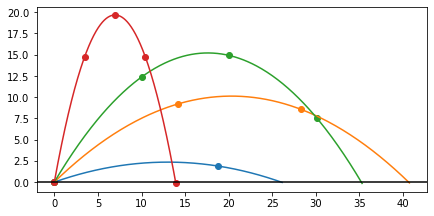

In [12]:
plot_trajectories(
    trajectory(20),
    trajectory(45),
    trajectory(60),
    trajectory(80),
    show_seconds=True
)

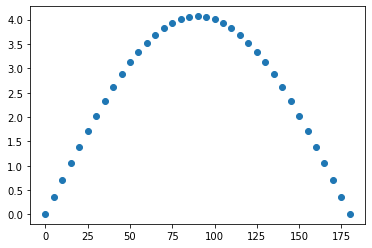

In [13]:
test_angles=range(0,181,5)
hang_times=[hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles,hang_times)

In [14]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,
               [metric(trajectory(theta,**settings))
               for theta in thetas])

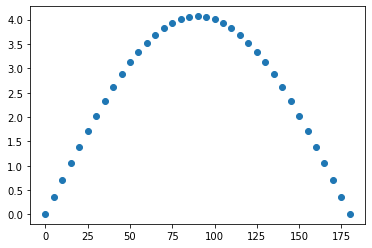

In [15]:
plot_trajectory_metric(hang_time,range(0,181,5))

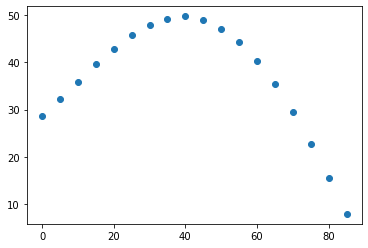

In [16]:
plot_trajectory_metric(landing_position,range(0,90,5),height=10)

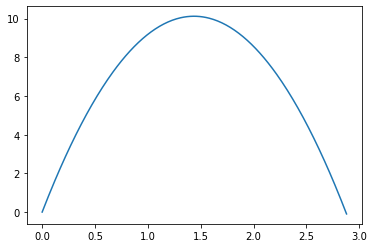

In [19]:
trj=trajectory(45)
ts,zs=trj[0],trj[2]
plt.plot(ts,zs)

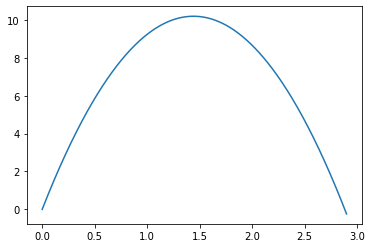

In [20]:
def z(t):
    return 20*sin(45*pi/180)*t+(-9.81/2)*t**2

plot_function(z,0,2.9)

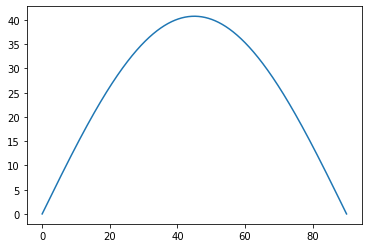

In [23]:
def r(theta):
    return (-2*20*20/-9.81*sin(theta*pi/180)*cos(theta*pi/180))

plot_function(r,0,90)